In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [15]:
2.626*1.2/10

0.31511999999999996

In [16]:
a = 4.5 - .315
b = 4.5+.315
print(a)
print(b)

4.185
4.815


In [17]:
t = 2.06
me = t*2.8/5
a = 28.6 - me
b = 28.6 + me
print(a)
print(b)

27.4464
29.753600000000002


`Question: 1` A company wants to estimate the average time spent by customers on their website per session. They collect a random sample of 100 customers and find that the sample mean time spent is 4.5 minutes with a sample standard deviation of 1.2 minutes. Calculate a 99% confidence interval for the true population mean time spent on the website per session.


`Question 2:` A car manufacturer is interested in estimating the mean gas mileage of their new SUV. A sample of 25 SUVs is taken, and their mean gas mileage is found to be 28.6 miles per gallon with a standard deviation of 2.8 miles per gallon. Calculate a 95% confidence interval for the true mean gas mileage of the SUV.

`Question -3:` Dataset - India temperature dataset.

Data link: https://drive.google.com/file/d/1whb8Rjdk9TBKOwVi8NwZD1Tc8Tdv7iEc/view?usp=share_link

Kaggle Link : (Just take IND data for this question, have to apply filtering). https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

A climate research organization wants to estimate the average temperature of a certain country. They collect temperature data for 2613 days but due to certain limitations, they only have information about the average temperature for 2508 days. The organization assumes that the population follows a normal distribution and wants to estimate the population mean temperature with a 95% confidence interval.

* Standard deviation is assumed as given data standard deviation. z Procedure
* Standard deviation is not given. Apply t Procedure

In [3]:
india_temp = pd.read_csv('data/ind_temp.csv')
india_temp.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1796-01-01,17.044,2.044,India
1,1796-02-01,19.193,1.359,India
2,1796-03-01,22.319,2.125,India


In [4]:
india_temp.tail(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
2610,2013-07-01,27.012,0.197,India
2611,2013-08-01,26.555,0.242,India
2612,2013-09-01,NaN,NaN,India


In [5]:
india_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2613 non-null   object 
 1   AverageTemperature             2508 non-null   float64
 2   AverageTemperatureUncertainty  2508 non-null   float64
 3   Country                        2613 non-null   object 
dtypes: float64(2), object(2)
memory usage: 81.8+ KB


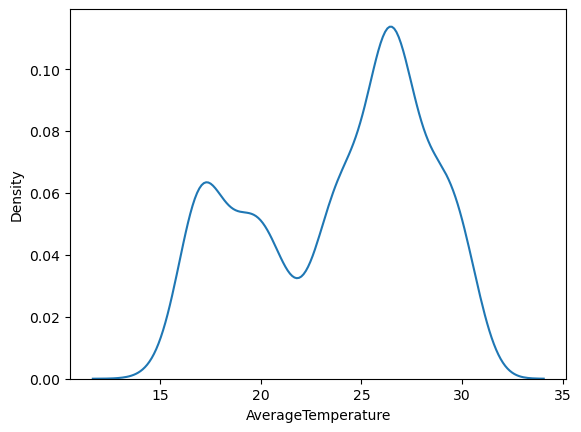

In [6]:
sns.kdeplot(india_temp['AverageTemperature'])
plt.show()

Since distribution is not normal,  
we need to make a sampling distribution so that the mean of sampling distribution follows normal distribution.

In [23]:
def take_sample(arr,size,num_samples):
    """
    arr --> input array,
    size --> size of each sample,
    num_samples --> number of samples each of size = size to be taken
    
    returns list of length = num_samples and each item is a 1d array of size = size
    """
    
    sampling_dist_list = []
    for i in range(num_samples):
        random_samples = np.random.choice(arr,size = size, replace = False)
        sampling_dist_list.append(random_samples)
     
    return sampling_dist_list

In [24]:
sampling_dist = take_sample(india_temp['AverageTemperature'].dropna(),50,200)
sampling_dist = np.array(sampling_dist)
print(sampling_dist.shape)

(200, 50)


<Axes: ylabel='Density'>

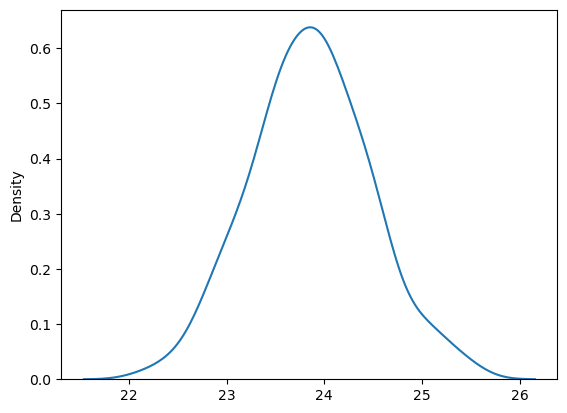

In [25]:
sns.kdeplot(sampling_dist.mean(axis = 1))

## Z Procedure

In [16]:
import scipy.stats as ss

In [26]:
sd = np.round(india_temp['AverageTemperature'].dropna().std(),2)
x_bar = np.round(india_temp['AverageTemperature'].dropna().mean(),2)
print(sd)
print(x_bar)

4.33
23.87


In [27]:
n = india_temp['AverageTemperature'].count()

In [28]:
sampling_dist.mean(axis=1)

array([23.83342, 23.77666, 24.40974, 24.02872, 24.9568 , 24.31332,
       23.72964, 23.29344, 23.90388, 24.19228, 22.81034, 23.7352 ,
       23.04016, 22.52886, 22.17588, 23.51026, 24.0828 , 24.62196,
       23.2762 , 23.83676, 24.67406, 24.01308, 24.39622, 23.96382,
       24.0364 , 23.9681 , 24.26792, 24.9472 , 23.0033 , 22.92362,
       23.60184, 24.652  , 23.40902, 23.33006, 23.01898, 23.49224,
       25.03462, 24.55408, 22.40712, 23.17614, 23.15948, 25.38696,
       24.59796, 23.8094 , 25.09156, 24.62222, 23.52272, 24.16032,
       24.2568 , 23.4028 , 23.73524, 23.6511 , 24.01212, 23.83148,
       24.43688, 23.72404, 24.25318, 24.3846 , 23.28246, 23.8296 ,
       23.49998, 23.58266, 23.6124 , 23.84192, 23.34594, 23.6731 ,
       24.34922, 24.17982, 24.21374, 24.60322, 24.16788, 23.45866,
       23.14868, 23.75704, 23.75596, 24.38488, 23.42338, 23.9848 ,
       24.28542, 23.287  , 23.928  , 23.29174, 23.56782, 25.24516,
       23.87866, 23.40946, 23.55398, 23.12908, 24.30224, 24.03

In [30]:
confidence = .95
cum_prob = confidence + (1-confidence)/2
z_crit = np.round(ss.norm.ppf(cum_prob),2)
print(z_crit)

me = z_crit*sd/np.sqrt(sampling_dist.shape[1])
print(me)

lower_limit = np.mean(sampling_dist.mean(axis = 1)) - me
upper_limit = np.mean(sampling_dist.mean(axis = 1)) + me

print('Confidence Interval for {}% confidence is [{} - {}]'
      .format(confidence*100,np.round(lower_limit,2),np.round(upper_limit,2)))
print('Actual mean temperature of population: ',x_bar)

1.96
1.2002147661147984
Confidence Interval for 95.0% confidence is [22.66 - 25.06]
Actual mean temperature of population:  23.87


## Using T method --> population std unknown

In [33]:
sampling_dist.std(axis = 1).mean()

4.322058033492838

In [34]:
# std dev of sample --> we take the mean of std of each of the 200 sets of samples
s = np.round(np.mean(sampling_dist.std(axis = 1)),2)
n = 50

confidence = .95
cum_prob = confidence + (1-confidence)/2

t_crit = np.round(ss.t.ppf(cum_prob,n-1),2)
print(t_crit)

me = t_crit*s/np.sqrt(n)
print(me)

lower_limit = np.mean(sampling_dist.mean(axis = 1)) - me
upper_limit = np.mean(sampling_dist.mean(axis = 1)) + me

print('Confidence Interval for {}% confidence is [{} - {}]'
      .format(confidence*100,np.round(lower_limit,2),np.round(upper_limit,2)))
print('Actual mean temperature of population: ',x_bar)

2.01
1.2279899204798057
Confidence Interval for 95.0% confidence is [22.63 - 25.09]
Actual mean temperature of population:  23.87


`Question 5:` BMW Dataset : https://drive.google.com/file/d/18amVv1WKKHEmwyvVy0RuXp4A6xrGOelc/view?usp=share_link



* Task 1:
The sales manager of a used car company wants to know what is the average selling price of all the used bmw cars.
The analyst can collect only a sample of sales of 500 cars in the area. Since this estimate is going to be used by the company to strategize sales of his company, the sample mean should be a good approximation of all the account.
What level of confidence is the sales manager going to be satisfied with? What +/- interval number is going to be acceptable?

* Task 2:
In addition to the price of the car, the manager also wants to now know the average mileage that the car has been driven. But the manager does not have the population standard deviation for the mileage. But the mileage data is available only from the 25 cars that they have sold so far.
How do the analyst approach this problem to calculate 95% confidence interval, with only 25 samples?

* Task 3:
The manager is not happy with both the intervals (intervals from task 1 and 2) as the interval for the confidence is very high. The manager now asks the analyst to estimate the average price of the car (similar to task 1) but within a bound of 750 from the mean with 95% condidence level. How many sample does the analyst have to collect to arrive at this confidence interval level?

* Task 4:
Conversely, after the analyst started collecting the data, after a week he was only able to collect for 420 samples, though he needs 540 samples for Bound of 1,000, if he has to do the analysis now, what is the best interval he can acheive for 95% confidence levels?

In [35]:
bmw = pd.read_csv('data/bmw.csv')
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [36]:
bmw.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0


## Task 1 -->Price

### Students T distribution

### Since we have sample data to deal with lets use T-dist and n = 500 and 95% confidence level

In [45]:
bmw_sample = list(take_sample(bmw['price'],500,1)[0])
bmw_sample = np.array(bmw_sample)

#calculate sample mean and std dev
bmw_sample_mean = bmw_sample.mean()
bmw_sample_std = bmw_sample.std()
print(bmw_sample_mean)
print(bmw_sample_std)

22888.15
11479.90098439442


In [51]:
# std dev of sample --> we take the mean of std of each of the 200 sets of samples
s = np.round(bmw_sample_std)
n = bmw_sample.shape[0]

confidence = .95
cum_prob = confidence + (1-confidence)/2

t_crit = np.round(ss.t.ppf(cum_prob,n),2)
print(t_crit)

me = t_crit*s/np.sqrt(n)
print(me)

lower_limit = bmw_sample_mean - me
upper_limit = bmw_sample_mean + me

print('Confidence Interval for {}% confidence is [{} - {}]'
      .format(confidence*100,np.round(lower_limit,2),np.round(upper_limit,2)))
print('Actual mean temperature of population: ',bmw['price'].mean())

1.96
1006.2663669625452
Confidence Interval for 95.0% confidence is [21881.88 - 23894.42]
Actual mean temperature of population:  22733.408867452


## Task 2--> mileage

In [65]:
bmw_sample = list(take_sample(bmw['mileage'],25,1)[0])
bmw_sample = np.array(bmw_sample)

#calculate sample mean and std dev
bmw_sample_mean = bmw_sample.mean()
bmw_sample_std = bmw_sample.std(ddof = 1)
print(bmw_sample_mean)
print(bmw_sample_std)

27799.08
23254.041756076153


In [66]:
# std dev of sample --> we take the mean of std of each of the 200 sets of samples
s = np.round(bmw_sample_std)
n = bmw_sample.shape[0]

confidence = .95
cum_prob = confidence + (1-confidence)/2
print(cum_prob)

t_crit = np.round(ss.t.ppf(cum_prob,n-1),2)
print(t_crit)

me = t_crit*s/np.sqrt(n)
print(me)

lower_limit = bmw_sample_mean - me
upper_limit = bmw_sample_mean + me

print('Confidence Interval for {}% confidence is [{} - {}]'
      .format(confidence*100,np.round(lower_limit,2),np.round(upper_limit,2)))
print('Actual mean mileage of cars: ',bmw['mileage'].mean())

0.975
2.06
9580.648
Confidence Interval for 95.0% confidence is [18218.43 - 37379.73]
Actual mean mileage of cars:  25496.986550412763


### Miscellaneos Problems

In [1]:
import numpy as np
import math

In [2]:
np.sqrt(50)/4

1.7677669529663689

In [4]:
1 - 2*(1-.9616)

0.9232

In [5]:
1.96*100/6

32.666666666666664

In [6]:
1980+32.6

2012.6

In [7]:
1980-32.6

1947.4

In [8]:
def only_x_defective(n,x,p):
    return math.comb(n,x)*math.pow(p,x)*math.pow(1-p,n-x)

In [12]:
n = 100
p=.05

sum = 0
for i in range(8):
    sum+=only_x_defective(n,i,p)
    
print(1-sum)    

0.1279604786203825


In [ ]:
1-